## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [284]:
ds['price'].max()

8500000

#### What is cheapest home in the dataset? (★☆☆)

In [285]:
x = ds['price'].dropna().replace(0, None).dropna()
minimo = x.min()
print(minimo)

600


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [286]:
ds['surface'].agg(['min', 'max'])


min        15.0
max    249000.0
Name: surface, dtype: float64

#### How many populations (level5) the dataset contains? (★☆☆)

In [287]:
ds['level5'].nunique()

168

#### Does the dataset contain NAs? (★☆☆)


In [288]:
nulos =ds.isna().sum()
print(nulos)

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64


#### Delete the NAs of the dataset, if applicable (★★☆)

In [289]:
ds.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15335 non-null  object 
 4   phone_realEstate  15335 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             15335 non-null  float64
 7   bathrooms         15335 non-null  float64
 8   surface           15335 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15335 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [290]:
poblacion = ["Arroyomolinos (Madrid)"]
poblacion2= ds['level5'].isin(poblacion)
poblacion3 = ds[poblacion2]
precio_medio = poblacion3['price'].mean()
print(precio_medio)

294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

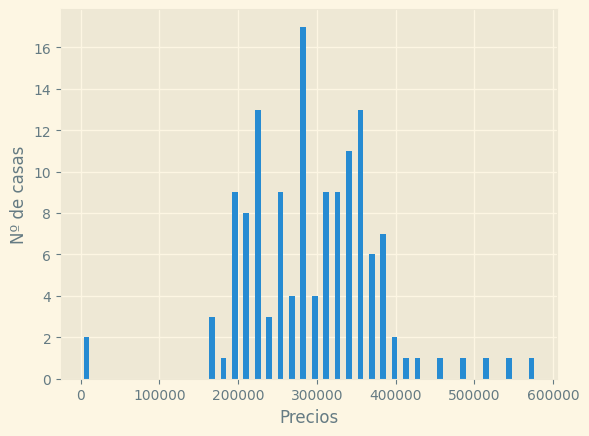

Se observa que el precio medio de ArroyoMolinos oscila entre 200.000 y 350.000 Euros 


In [291]:
import matplotlib.pyplot as plt
poblacion = ["Arroyomolinos (Madrid)"]
poblacion2= ds['level5'].isin(poblacion)
poblacion3 = ds[poblacion2]
poblacion3['price'].plot.hist(rwidth=0.5, bins=40)
plt.xlabel('Precios')
plt.ylabel('Nº de casas')
plt.show()
print (f"Se observa que el precio medio de ArroyoMolinos oscila entre 200.000 y 350.000 Euros ")

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [293]:
poblacion = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
edma = ds['level5'].isin(poblacion)
sub = ds[edma]
print (sub)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

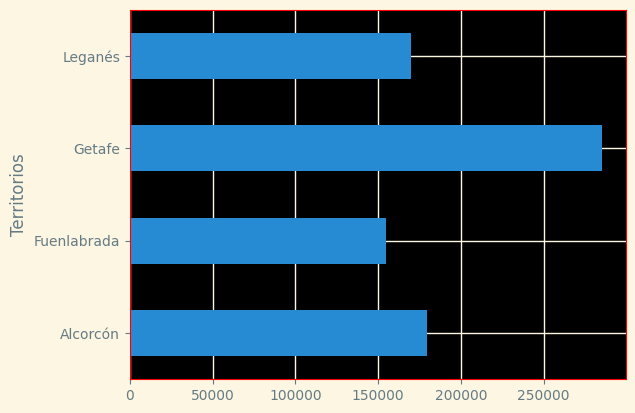

In [276]:
mena = sub.groupby('level5')['price'].median()
fig, ax = plt.subplots()
mena.plot.barh()
plt.ylabel('Territorios')
ax.set_facecolor('Black')
for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_color('red')
for iterable in enumerate(mena):
    ax
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [294]:
precio_medio = sub['price'].mean()
precio = sub['price'].var()
print(f"-Precio: {round(precio_medio)} \n-Precio: {precio}")

print ("-------------")
habitaciones_medias = sub['rooms'].mean()
habitaciones = sub['rooms'].var()
print(f"-Habitaciones: {round(habitaciones_medias)}\n-Habitaciones: {habitaciones}")

print ("-------------")
area_media = sub['surface'].mean()
area = sub['surface'].var()
print(f"-Area: {round(area_media)}\n-Area: {area}")

print ("-------------")
media_baño = sub['bathrooms'].mean()
baños = sub['bathrooms'].var()
print(f"-Baños: {round(media_baño)}\n-Baños: {baños}")




-Precio: 223094 
-Precio: 14921367508.04902
-------------
-Habitaciones: 3
-Habitaciones: 0.7188858892927542
-------------
-Area: 112
-Area: 4263.051760316337
-------------
-Baños: 2
-Baños: 0.5717968625577321


#### What is the most expensive home of each population? (★★☆) 

In [295]:
preciomaximo = sub.groupby('level5')['price'].agg(['min', 'max'])
print(preciomaximo)

               min      max
level5                     
Alcorcón     91500   950000
Fuenlabrada  89000   490000
Getafe           0  1050000
Leganés      60000   650000


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

Primer Grafico: Fuenlabrada 
Segundo Grafico: Leganes 
Tercer Grafico: Getafe 
Cuarto Grafico: Alcorcón


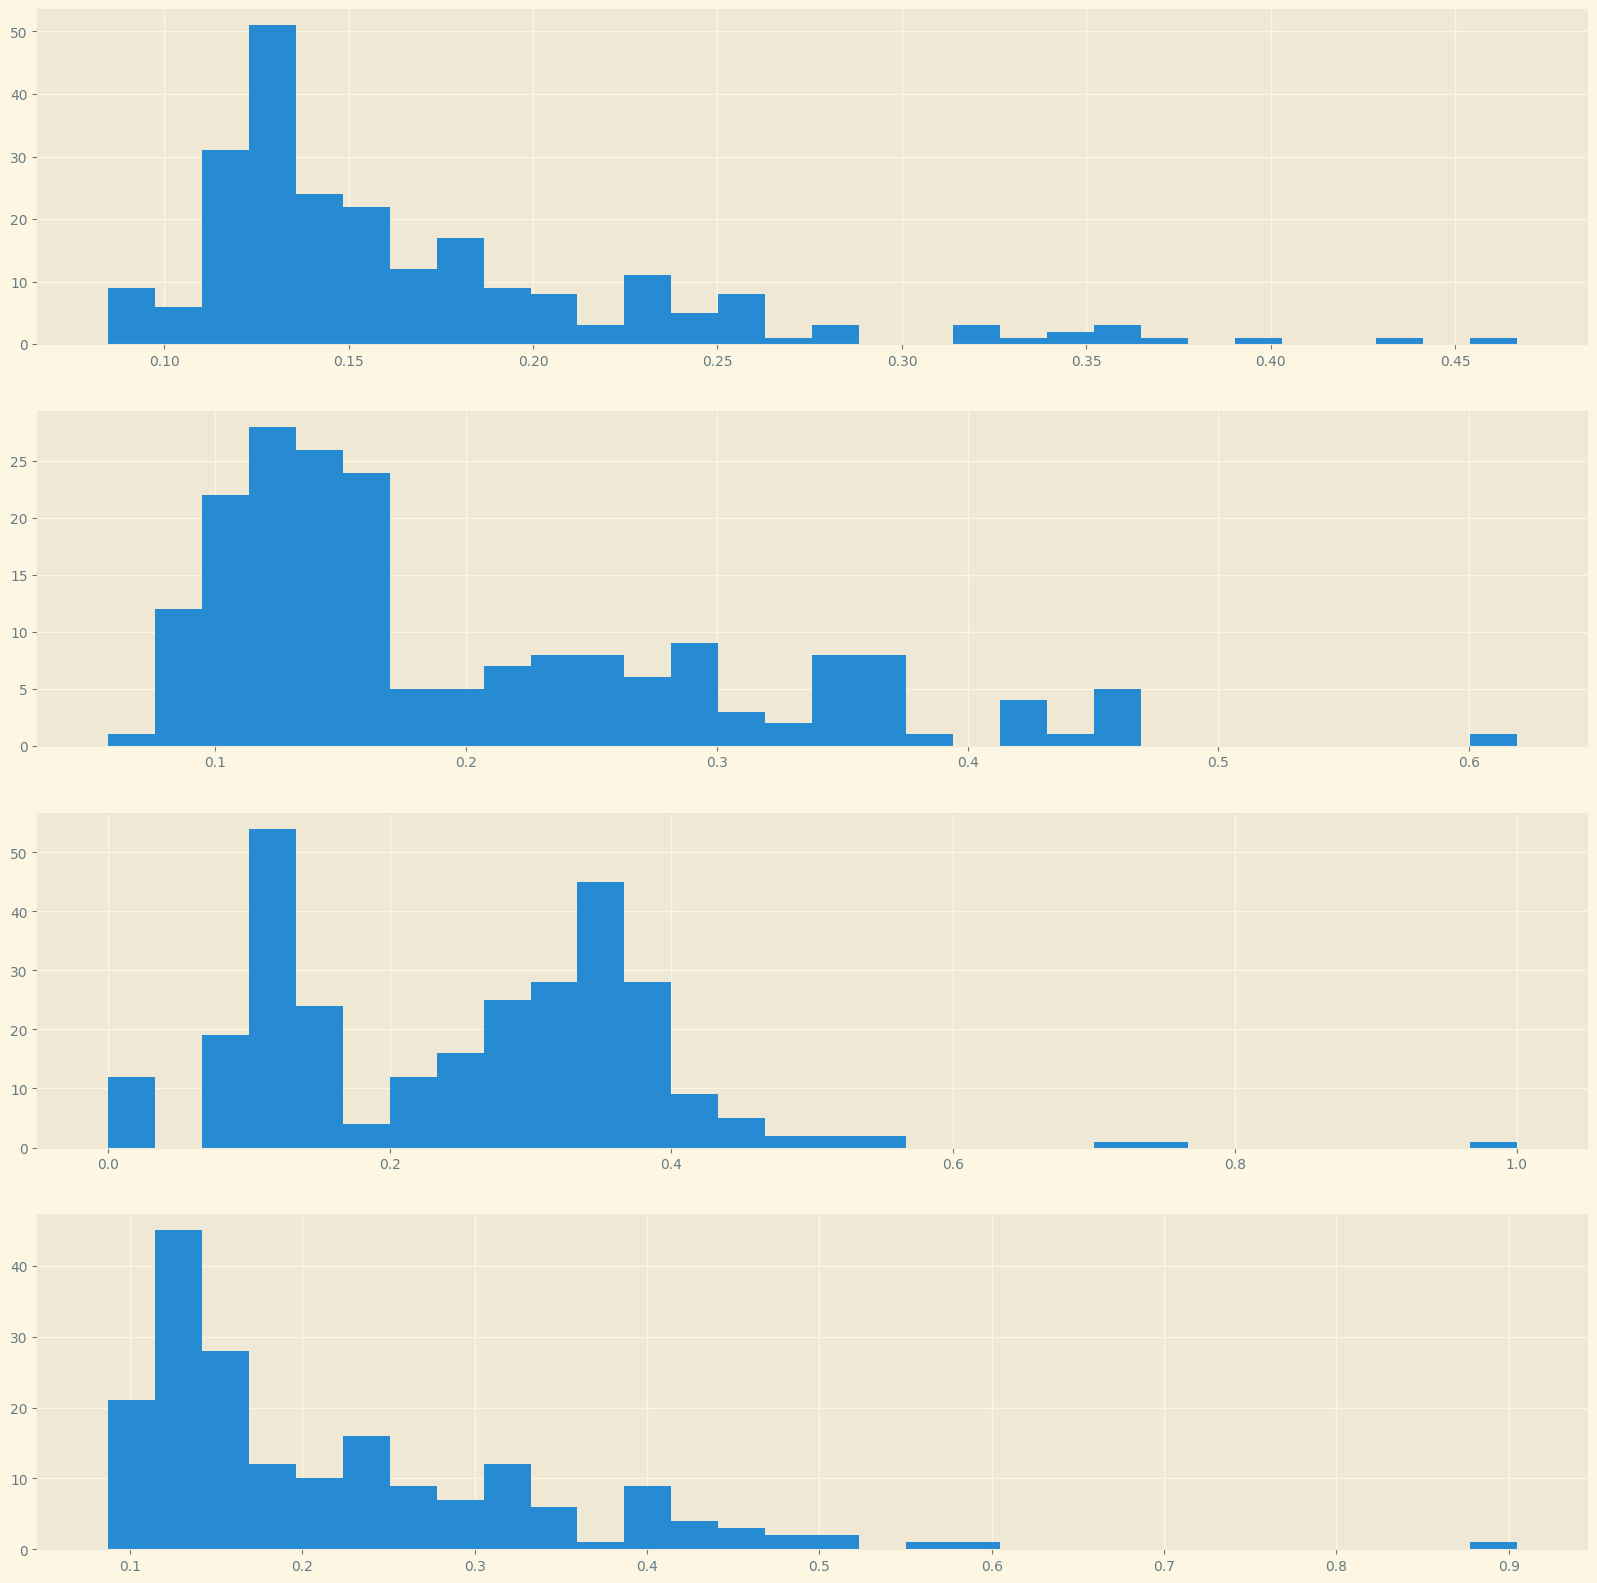

In [296]:
print ("Primer Grafico: Fuenlabrada \nSegundo Grafico: Leganes \nTercer Grafico: Getafe \nCuarto Grafico: Alcorcón")
lugares = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
var = ds['level5'].isin(lugares)
sub = ds[var].copy()
sub['x'] = (sub['price'] - sub['price'].min()) / (sub['price'].max() - sub['price'].min())
fig, axs = plt.subplots(4, figsize=(20, 20))
for iterador, habitantes in enumerate(lugares):
    habitat = sub[sub['level5'] == habitantes]
    axs[iterador].hist(habitat['x'], bins=30)
plt.show()


#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [68]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

AZUL = GETAFE 
VERDES: ALCORCON


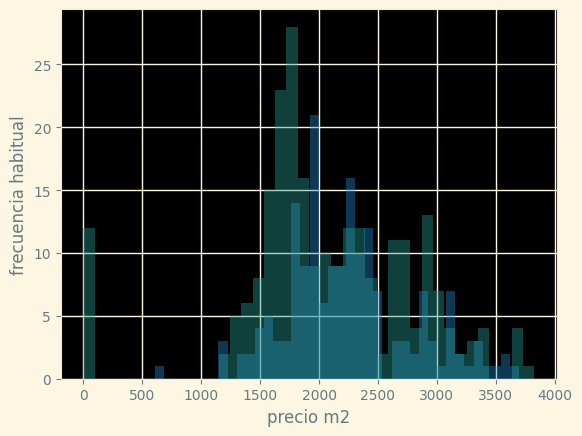

In [297]:
print ("AZUL = GETAFE \nVERDES: ALCORCON")

poblacionanalisis = ["Getafe", "Alcorcón"]
comprobar = ds['level5'].isin(poblacionanalisis)
ax.legend(poblacionanalisis)
sett = ds[comprobar].copy()
sett['m2'] =sett['price'] / sett['surface'] 
fig, ax = plt.subplots()
sett.groupby('level5')['m2'].plot(kind='hist', ax=ax, alpha=0.4, bins=40)
ax.set_xlabel('precio m2')
ax.set_facecolor('black')
ax.set_ylabel('frecuencia habitual')
plt.show()

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [298]:
poblacion1 = ["Galapagar"]
bol1 = ds['level5'].isin(poblacion1)
subpoblacion1 = ds[bol1]
precio1 = subpoblacion1.groupby('level5')['price'].mean()
print (precio1)


poblacion2 = ["Valdemorillo"]
bol2 = ds['level5'].isin(poblacion2)
subpoblacion2 = ds[bol1]
precio2 = subpoblacion2.groupby('level5')['price'].mean()
print (precio2)

level5
Galapagar    360063.202381
Name: price, dtype: float64
level5
Galapagar    360063.202381
Name: price, dtype: float64


#### What happens if we do the same analysis for price/m2 (★★☆) 

AZUL: VALDEMORILLO 
VERDE: GALAPAGAR
Valdemorillo tiene las casas mas caras


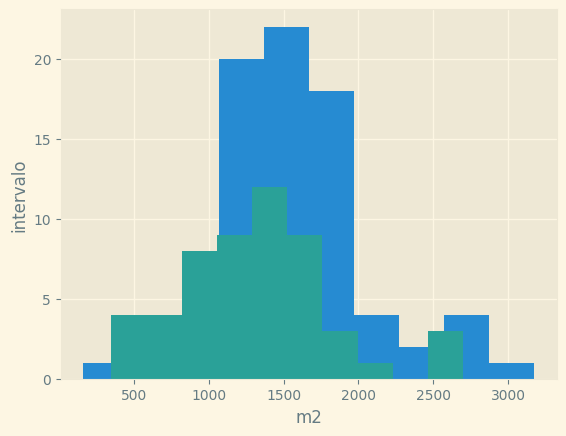

In [299]:
poblacion1= ["Valdemorillo"]
poblacion2 =["Galapagar"]
poblacion = poblacion1+poblacion2
dar = ds['level5'].isin(poblacion)
sub = ds[dar].copy()
sub['m2'] = sub['price'] / sub['surface']
fig, ax = plt.subplots()
sub.groupby('level5')['m2'].plot(kind='hist')
ax.set_xlabel('m2')
ax.set_ylabel('intervalo')

print("AZUL: VALDEMORILLO \nVERDE: GALAPAGAR")
print ("Valdemorillo tiene las casas mas caras")
plt.show()



#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

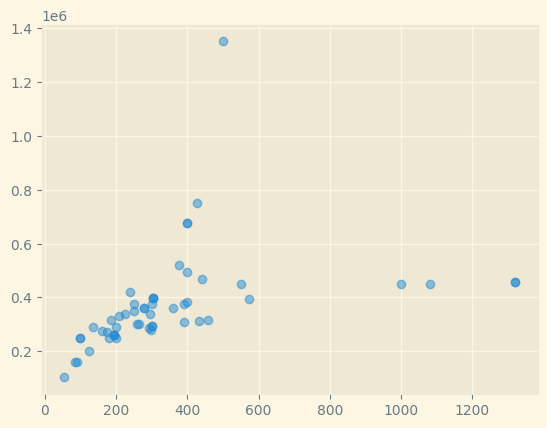

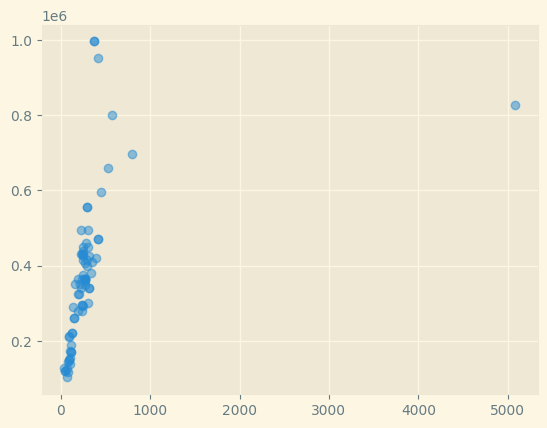

In [314]:

poblacion1= ["Valdemorillo"]
poblacion2 =["Galapagar"]
poblacion = poblacion1+poblacion2
sub1 = ds.copy() 
sub1['m2'] = sub1['price'] / sub1['surface']

for iterable in poblacion:
    fig, ax = plt.subplots()
    subset_population = sub1[sub1['level5'] == iterable]
    ax.scatter(subset_population['surface'], subset_population['price'], alpha=0.5, label=iterable)
    
plt.show()

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

Primer Grafico: Fuenlabrada 
Segundo Grafico: Leganes 
Tercer Grafico: Getafe 
Cuarto Grafico: Alcorcón


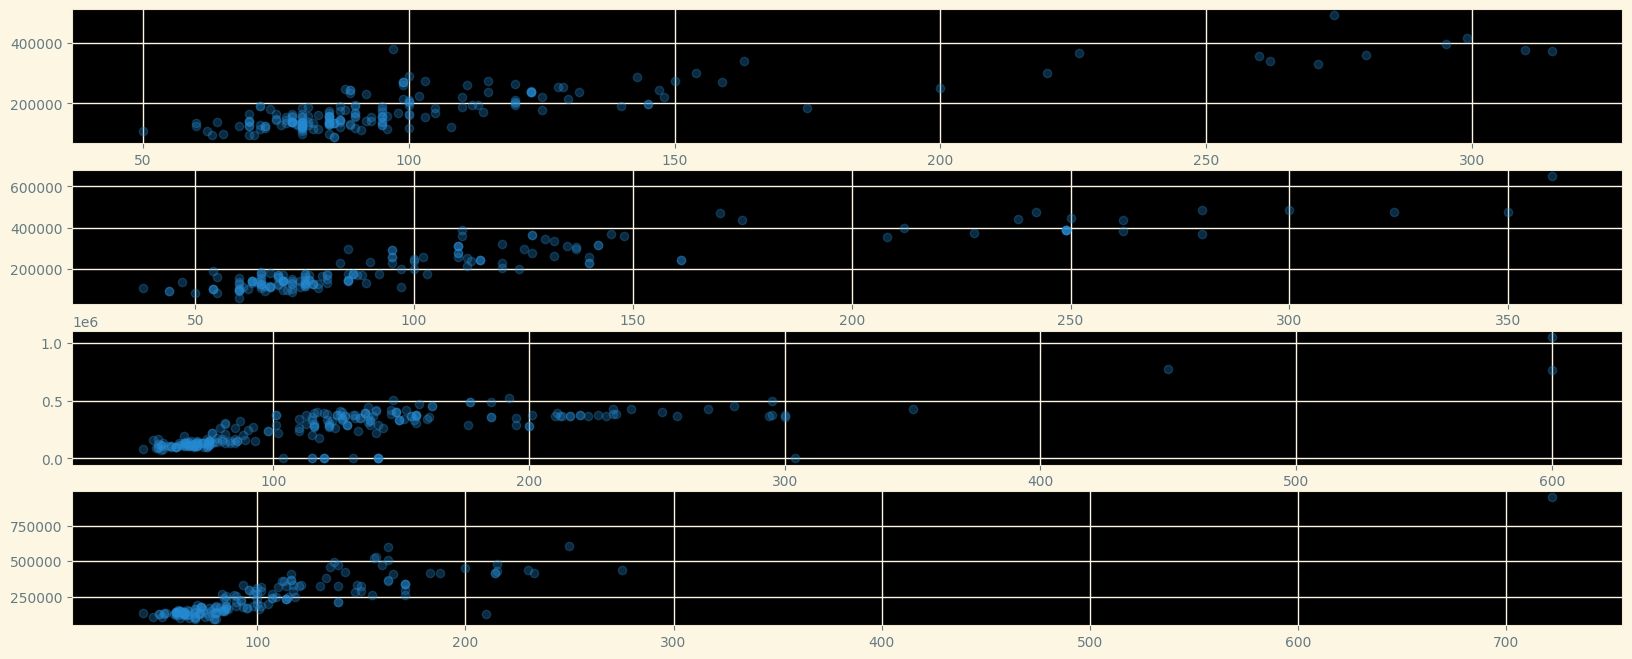

In [301]:
print ("Primer Grafico: Fuenlabrada \nSegundo Grafico: Leganes \nTercer Grafico: Getafe \nCuarto Grafico: Alcorcón")
poblacion = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

busd = ds['level5'].isin(poblacion)
sub = ds[busd]

fig, axes = plt.subplots(4, figsize=(20, 8))
for iterable, ite2 in enumerate(poblacion):
    sub2 = sub[sub['level5'] == ite2]
    ax = axes[iterable]
    ax.scatter(sub2['surface'], sub2['price'], alpha=0.3, label=ite2)
    ax.set_facecolor('black')

plt.show()




#### How many  real estate agencies the dataset contains? (★★☆) 

In [161]:
print(ds['realEstate_name'].nunique())

1821


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [163]:
valores = ds['level5'].value_counts()
maxserie = valores.idxmax()
print(maxserie)

 Madrid Capital
